This code transforms the original data formats into GeoJSON files, removing unnecessary attributes along the way.

The gbd files are in CRS : EPSG-26913


### Setup

In [7]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString


os.chdir('/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/Data')
pd.options.display.max_columns = None

# Load Data
gdf0 = gpd.GeoDataFrame(gpd.read_file("ECMC_Flowline_Data_Access/COGCC_Form44_Off_Location_Flowlines_Approved_CONFIDENTIAL.gdb"))
gdf1 = gpd.GeoDataFrame(gpd.read_file("ECMC_Flowline_Data_Access/COGCC_Form44_Crude_Oil_Produced_Water_Transfer_Flowlines_Approved_CONFIDENTIAL.gdb"))
flowlines = pd.read_excel('FlowlineSpreadsheet_Mines.xlsx')
spills = pd.read_excel('Flowline-Related Spills (2022).xlsx')

/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/ecmc_env/lib/python3.11/site-packages/pyogrio/geopandas.py:261: UserWarning: More than one layer found in 'COGCC_Form44_Off_Location_Flowlines_Approved_CONFIDENTIAL.gdb': 'Off_Location_Flowlines' (default), 'Off_Location_Flowline_Valves'. Specify layer parameter to avoid this warning.
  result = read_func(
/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/ecmc_env/lib/python3.11/site-packages/pyogrio/geopandas.py:261: UserWarning: More than one layer found in 'COGCC_Form44_Crude_Oil_Produced_Water_Transfer_Flowlines_Approved_CONFIDENTIAL.gdb': 'Crude_Oil_Produced_Water_Transfer_Lines' (default), 'Crude_Oil_Produced_Water_Transfer_Line_Valves'. Specify layer parameter to avoid this warning.
  result = read_func(


In [8]:
spills.info

<bound method DataFrame.info of        trkg_num                      Operator Name operator_num incident_date  \
0     400768997         PETRON DEVELOPMENT COMPANY        69760         42005   
1     400763041  PIONEER NATURAL RESOURCES USA INC        10084         42006   
2     400763258                   DCP MIDSTREAM LP         4680         42006   
3     400764687          BARRETT CORPORATION* BILL        10071         42008   
4     400764760  PIONEER NATURAL RESOURCES USA INC        10084         42008   
...         ...                                ...          ...           ...   
1721  403271296                   NOBLE ENERGY INC       100322    12/25/2022   
1722  403271510          WESTERN OPERATING COMPANY        95620    12/26/2022   
1723  403272631                     PDC ENERGY INC        69175    12/24/2022   
1724  403275244                     PDC ENERGY INC        69175    12/24/2022   
1725  403278607                CAERUS PICEANCE LLC        10456    12/31/2022

In data cleaning, keep:
- Tracking #
- Operator #
- Lat Long
- Failure mechanism 
- Material
- Fluid type 
- Size
- Age
- Status (active or not)

### Combine both gbd files

In [9]:
# Check if the CRS of gdf0 is different from that of gdf1
if gdf0.crs != gdf1.crs:
    # If true, convert the CRS of gdf1 to match that of gdf0, modifying gdf1 in place
    gdf1.to_crs(gdf.crs, inplace=True)

# Concatenate gdf0 and gdf1 into a single GeoDataFrame, ignoring the original indices to create a new continuous index
gdf = pd.concat([gdf0,gdf1],ignore_index=True)
gdf.head(1)

#EPSG-26913

,Operator,Fluid,Material,Diam_in,Status,Length_ft,Doc_Num,SHAPE_Length,geometry
0,EVERGREEN NATURAL RESOURCES LLC,Gas,polly,4.0,Active,2277.71,403322934,693.972162,"MULTILINESTRING ((524642.67 4117088.796, 52463..."


In [10]:
# remove Doc_Num
gdf.drop(columns=['Doc_Num'], inplace=True)

<Axes: >

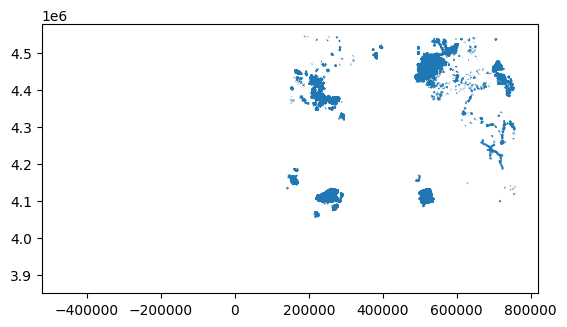

In [11]:
gdf.plot()

### Clean Flowlines

In [12]:
flowlines.head(2)

,DOC_NUM,FORM_NUM,RECEIVE_DATE,OPERATOR_NUM,COMPANY_NAME,SUBMIT_DATE,STATUS_DATE,FACILITY_ID,STATUS,USER_NAME,DATA_ENTRY_DATE,DATA_ENTRY_OP,LOCATION_ID,LAST_USER,LAST_UPDATE_USER,LAST_UPDATE_DATE,EXPR1,LOCATIONTYPE,NOLOCATIONID,FACILITY_NAME,FACILITY_NUM,COUNTY,QTRQTR,SEC,TWP,RANGE,MERIDIAN,LAT,LONG,PDOP,MEASURE_DATE,INSTRUMENT_OPERATOR,REPORTTYPE,ONECALLCODE,PLANNEDCONSTRUCTDATE,ASBUILTSERVICEDATE,MODABANDINFO,PKEY,SYSTEMTYPE,FLOWLINEID,FLOWLINETYPE,ENDEQUIPTYPE,ENDLAT,ENDLONG,ENDUTMX,ENDUTMY,ENDPDOP,ENDDATE,TYPEOFSTARTLOCATION,STARTEQUIPTYPE,STARTLOCATIONID,STARTLOCATIONOID,STARTFACNAME,STARTFACNUMBER,STARTFACCOUNTY,STARTFACQTRQTR,STARTFACSECTION,STARTFACTWP,STARTFACRANGE,STARTFACMERIDIAN,STARTFACLAT,STARTFACLONG,STARTFACUTMX,STARTFACUTMY,STARTFACPDOP,STARTFACDATE,STARTLAT,STARTLONG,STARTUTMX,STARTUTMY,STARTPDOP,STARTDATE,CONSTRUCTDATE,PIPEMATERIAL,PIPEOTHER,BEDDINGMATERIAL,BEDDINGOTHER,MAXOD,TYPEOFFLUIDTRANS,OTHERFLUID,MAXOPPRESSURE,TESTINGPRESSURE,TESTDATE,FLOWLINEACTION,ACTIONDATE,ACTIONDESCRIPTION,ENTIRELINEREMOVED,OPERATORFLOWLINEID
0,403564520,44,2023-10-30 08:10:52.12,10673,GADECO LLC ...,2023-10-30 08:10:52.12,2023-11-29 13:21:12.307,NaN,APPROVED,trent ...,2023-10-18 10:39:05.0,trent,331872.0,wheelers,wheelers,2023-11-29 13:20:08.413,331872.0,Well Site,False,CROISSANT-69N62W,26NENW,WELD,NENW,26,9N,62W,6,40.724723,-104.289869,NaN,NaN,NaN,Off-Location Flowline,NaN,NaN,NaN,NaN,[B@3a47216c,OffLocation,485633.0,Dump Line,Well,NaN,NaN,NaN,NaN,NaN,NaN,Production Facilities,Separator,NaN,True,GRAEFE-69N62W,26SWNW,WELD,SWNW,26,9N,62W,6,40.720843,-104.294569,559576,4508009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-15 00:00:00.0,HDPE,NaN,Native Materials,NaN,2.0,Produced Water,NaN,NaN,NaN,NaN,Registration,NaN,NaN,NaN,485273
1,403554566,44,2023-10-24 08:33:49.223,10633,CRESTONE PEAK RESOURCES OPERATING LLC ...,2023-10-24 08:33:49.223,2023-11-27 11:52:05.37,NaN,APPROVED,solsen ...,2023-10-09 14:56:12.247,solsen,470443.0,wheelers,wheelers,2023-11-27 11:50:08.687,470443.0,Production Facilities,False,EMERSON-62N67W,29SWNE,WELD,SWNE,29,2N,67W,6,40.109444,-104.909686,NaN,NaN,NaN,Off-Location Flowline,NaN,NaN,NaN,NaN,[B@1c56c730,OffLocation,470446.0,Wellhead Line,Separator,40.109444,-104.909686,507699.0,4439909.0,3.3,2019-06-18 12:02:00.0,Well Site,Well,NaN,False,EMERSON-62N67W,29CSE,WELD,CSE,29,2N,67W,6,40.105607,-104.909943,507675,4439483,NaN,NaN,40.105743,-104.90986,507685.0,4439496.0,5.4,2019-06-18 12:23:00.0,1983-11-09 00:00:00.0,Carbon Steel,NaN,Native Materials,NaN,2.0,Multiphase,NaN,325.0,NaN,NaN,NaN,2022-04-14 00:00:00.0,The flowline serving the Emerson 3-29J (05-123...,NaN,12311381_FL


In [13]:
# List all columns in the 'flowlines' DataFrame
columns_list = flowlines.columns.tolist()
print("Columns in spills DataFrame:", columns_list)

Columns in spills DataFrame: ['DOC_NUM', 'FORM_NUM', 'RECEIVE_DATE', 'OPERATOR_NUM', 'COMPANY_NAME', 'SUBMIT_DATE', 'STATUS_DATE', 'FACILITY_ID', 'STATUS', 'USER_NAME', 'DATA_ENTRY_DATE', 'DATA_ENTRY_OP', 'LOCATION_ID', 'LAST_USER', 'LAST_UPDATE_USER', 'LAST_UPDATE_DATE', 'EXPR1', 'LOCATIONTYPE', 'NOLOCATIONID', 'FACILITY_NAME', 'FACILITY_NUM', 'COUNTY', 'QTRQTR', 'SEC', 'TWP', 'RANGE', 'MERIDIAN', 'LAT', 'LONG', 'PDOP', 'MEASURE_DATE', 'INSTRUMENT_OPERATOR', 'REPORTTYPE', 'ONECALLCODE', 'PLANNEDCONSTRUCTDATE', 'ASBUILTSERVICEDATE', 'MODABANDINFO', 'PKEY', 'SYSTEMTYPE', 'FLOWLINEID', 'FLOWLINETYPE', 'ENDEQUIPTYPE', 'ENDLAT', 'ENDLONG', 'ENDUTMX', 'ENDUTMY', 'ENDPDOP', 'ENDDATE', 'TYPEOFSTARTLOCATION', 'STARTEQUIPTYPE', 'STARTLOCATIONID', 'STARTLOCATIONOID', 'STARTFACNAME', 'STARTFACNUMBER', 'STARTFACCOUNTY', 'STARTFACQTRQTR', 'STARTFACSECTION', 'STARTFACTWP', 'STARTFACRANGE', 'STARTFACMERIDIAN', 'STARTFACLAT', 'STARTFACLONG', 'STARTFACUTMX', 'STARTFACUTMY', 'STARTFACPDOP', 'STARTFACDAT

In [14]:
# Keep the following columns
selected_columns = ['LOCATION_ID', 'FLOWLINEID', 'STARTLOCATIONID', 'FLOWLINEACTION', 'ENTIRELINEREMOVED', 'ACTIONDESCRIPTION', 'RECEIVE_DATE', 'OPERATOR_NUM', 'COMPANY_NAME', 'LOCATIONTYPE', 'ENDLAT', 'ENDLONG', 'STARTLAT', 'STARTLONG',
                    'PIPEMATERIAL', 'BEDDINGMATERIAL', 'TYPEOFFLUIDTRANS', 'MAXOPPRESSURE', 'CONSTRUCTDATE']
flowlines_selected = flowlines[selected_columns]

### Clean spills excel (remove gathering)

In [15]:
spills.head(2)

,trkg_num,Operator Name,operator_num,incident_date,facility_type,Spill_Desc,county,Spill Type,Root Cause,Preventative Measure,Root Cause Type,Detailed Root Cause Type,Long,Lat,oil_spilled,oil_recovered,cond_spilled,cond_recovered,PW_spilled,PW_recovered,drilling_spilled,drilling_recovered,frac_spilled,frac_recovered,other_spilled,other_recovered,other_spilled_specify,facility_status,Basin,Gathering?,Metallic?,NaN,nan.1,On Location?,Fac or Loc ID
0,400768997,PETRON DEVELOPMENT COMPANY,69760,42005,WELL,A backup restraint that keeps our drive head o...,WASHINGTON,NaN,A backup restraint that keeps our drive head o...,We replaced the restraining chain with a heavi...,Incorrect Operation,Improper Procedures,-102.84418,40.14439,1.0,NaN,0.0,NaN,40.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,DENVER JULESBURG BASIN,Non-Gathering,Unknown,NaN,NaN,NaN,NaN
1,400763041,PIONEER NATURAL RESOURCES USA INC,10084,42006,WATER GATHERING SYSTEM/LINE,One inch valve on the waterline inside the met...,LAS ANIMAS,NaN,One inch valve on the waterline inside the met...,The valve has been replaced and everything is ...,Natural Force Damage,Valve Freeze,-104.90956,37.19037,0.0,NaN,0.0,NaN,20.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,RATON BASIN,Non-Gathering,Unknown,NaN,NaN,NaN,NaN


In [16]:
# List all columns in the 'spills' DataFrame
columns_list = spills.columns.tolist()
print("Columns in spills DataFrame:", columns_list)

Columns in spills DataFrame: ['trkg_num', 'Operator Name', 'operator_num', 'incident_date', 'facility_type', 'Spill_Desc', 'county', 'Spill Type', 'Root Cause', 'Preventative Measure', 'Root Cause Type', 'Detailed Root Cause Type', 'Long', 'Lat', 'oil_spilled', 'oil_recovered', 'cond_spilled', 'cond_recovered', 'PW_spilled', 'PW_recovered', 'drilling_spilled', 'drilling_recovered', 'frac_spilled', 'frac_recovered', 'other_spilled', 'other_recovered', 'other_spilled_specify', 'facility_status', 'Basin', 'Gathering?', 'Metallic?', nan, 'nan.1', 'On Location?', 'Fac or Loc ID']


In [17]:
# Keep the following columns
selected_columns = ['trkg_num', 'Operator Name', 'facility_type', 'Spill_Desc', 'Spill Type', 'Root Cause', 'Preventative Measure',
                    'Root Cause Type', 'Detailed Root Cause Type', 'Long', 'Lat','facility_status', 'Gathering?', 'Metallic?']
spills_selected = spills[selected_columns]

# Number of spills
num_rows = len(spills_selected)
print("Number of rows:", num_rows)

Number of rows: 1726


In [18]:
# Remove rows where the 'Gathering?' column has information (non-NaN values)
spills_cleaned = spills_selected[spills_selected['Gathering?'].isna()]

In [19]:
# Check if all gathering intances are removed
only_nan_columns = spills_cleaned.isna().all()

columns_with_all_nan = only_nan_columns[only_nan_columns].index.tolist()
print("Columns with all NaN values:", columns_with_all_nan)

Columns with all NaN values: ['Gathering?']


In [20]:
# Remove rows where 'Operator Name' contains the word "GATHERING"
spills_filtered = spills_cleaned[~spills_cleaned['Operator Name'].str.contains("GATHERING", case=False, na=False)]

In [21]:
# Remove 'Gathering?' and 'Operator Name' columns from the DataFrame
final_spills = spills_filtered.drop(columns=['Gathering?'])

In [22]:
# Number of spills after cleaning
num_rows = len(final_spills)
print("New number of rows:", num_rows)

New number of rows: 849


### Transform flowlines and spills excel files into gbd files

#### Flowlines Transformation

/var/folders/p3/gs65vvgs1wd90mnxb3q3hvy80000gp/T/ipykernel_4196/1872236487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flowlines_selected['geometry'] = ''


<Axes: >

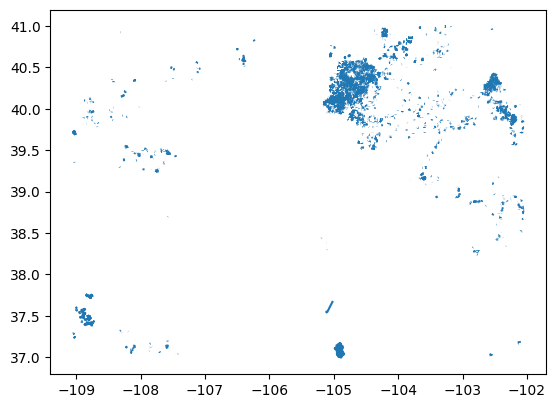

In [23]:
# Check if the 'geometry' column does not exist in the flowlines DataFrame and initialize it as an empty string if true
if 'geometry' not in flowlines_selected.columns:
    flowlines_selected['geometry'] = ''

# Iterate over each row in the flowlines DataFrame
for index, row in flowlines_selected.iterrows():
    # Create a LineString geometry from the start and end coordinates of each flowline
    geom = LineString([(row['STARTLONG'],row['STARTLAT']),(row['ENDLONG'],row['ENDLAT'])])
    # Assign the created LineString geometry to the 'geometry' column at the current index
    flowlines_selected.at[index,'geometry'] = geom

# Convert the flowlines DataFrame into a GeoDataFrame, explicitly setting the 'geometry' column and the Coordinate Reference System (CRS) to 'EPSG:4326' (WGS 84)
fl_gdf = gpd.GeoDataFrame(flowlines_selected, geometry='geometry', crs='EPSG:4326')
fl_gdf.plot()

In [24]:
# Check if the CRS of fl_gdf is different from that of gdf
if fl_gdf.crs != gdf.crs:
    # If true, convert the CRS of fl_gdf to match that of gdf, modifying fl_gdf in place
    fl_gdf.to_crs(gdf.crs, inplace=True)
    print('Change fl crs to gdf crs')

Change fl crs to gdf crs


In [25]:
fl_gdf

,LOCATION_ID,FLOWLINEID,STARTLOCATIONID,FLOWLINEACTION,ENTIRELINEREMOVED,ACTIONDESCRIPTION,RECEIVE_DATE,OPERATOR_NUM,COMPANY_NAME,LOCATIONTYPE,ENDLAT,ENDLONG,STARTLAT,STARTLONG,PIPEMATERIAL,BEDDINGMATERIAL,TYPEOFFLUIDTRANS,MAXOPPRESSURE,CONSTRUCTDATE,geometry
0,331872.0,485633.0,NaN,Registration,NaN,NaN,2023-10-30 08:10:52.12,10673,GADECO LLC ...,Well Site,NaN,NaN,NaN,NaN,HDPE,Native Materials,Produced Water,NaN,2000-07-15 00:00:00.0,"LINESTRING (NaN NaN, NaN NaN)"
1,470443.0,470446.0,NaN,NaN,NaN,The flowline serving the Emerson 3-29J (05-123...,2023-10-24 08:33:49.223,10633,CRESTONE PEAK RESOURCES OPERATING LLC ...,Production Facilities,40.109444,-104.909686,40.105743,-104.909860,Carbon Steel,Native Materials,Multiphase,325.0,1983-11-09 00:00:00.0,"LINESTRING (507682.442 4439497.658, 507696.855..."
2,470443.0,470445.0,319521.0,Out of Service,True,The flowline (12311399_FL) servicing the Emers...,2023-10-24 08:33:49.223,10633,CRESTONE PEAK RESOURCES OPERATING LLC ...,Production Facilities,40.109441,-104.909670,40.112203,-104.909862,Carbon Steel,Native Materials,Multiphase,250.0,1983-12-07 00:00:00.0,"LINESTRING (507681.545 4440214.668, 507698.219..."
3,318620.0,466061.0,305594.0,NaN,NaN,NaN,2023-10-24 16:00:01.117,68710,PETERSON ENERGY OPERATING INC ...,Production Facilities,40.063138,-105.034086,40.063823,-105.030068,Carbon Steel,NaN,Multiphase,NaN,2006-06-05 00:00:00.0,"LINESTRING (497435.796 4434841.42, 497093.111 ..."
4,318620.0,466062.0,305595.0,NaN,NaN,NaN,2023-10-24 16:00:01.117,68710,PETERSON ENERGY OPERATING INC ...,Production Facilities,40.063142,-105.034085,40.060063,-105.034795,Carbon Steel,NaN,Multiphase,NaN,2007-04-08 00:00:00.0,"LINESTRING (497032.513 4434424.239, 497093.196..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21937,446052.0,455232.0,333012.0,Registration,NaN,NaN,2018-05-04 09:16:11.403,100322,NOBLE ENERGY INC ...,Production Facilities,40.397700,-104.647660,40.398090,-104.642610,NaN,NaN,NaN,NaN,2001-10-02 00:00:00.0,"LINESTRING (530328.842 4472004.142, 529900.46 ..."
21938,455177.0,455190.0,310572.0,Registration,NaN,NaN,2018-05-10 12:16:07.97,100322,NOBLE ENERGY INC ...,Production Facilities,40.481530,-104.492930,40.481330,-104.491050,NaN,NaN,NaN,NaN,2008-02-22 00:00:00.0,"LINESTRING (543137.34 4481306.751, 542977.867 ..."
21939,455096.0,455155.0,306660.0,Registration,NaN,NaN,2018-05-10 13:40:00.33,100322,NOBLE ENERGY INC ...,Production Facilities,40.495330,-104.772282,40.489670,-104.771610,NaN,NaN,NaN,NaN,2007-08-05 00:00:00.0,"LINESTRING (519355.342 4482133.153, 519296.77 ..."
21940,455096.0,455156.0,306575.0,Registration,NaN,NaN,2018-05-10 13:40:00.33,100322,NOBLE ENERGY INC ...,Production Facilities,40.495330,-104.772282,40.493320,-104.770310,NaN,NaN,NaN,NaN,1998-09-27 00:00:00.0,"LINESTRING (519464.458 4482538.588, 519296.77 ..."


<Axes: >

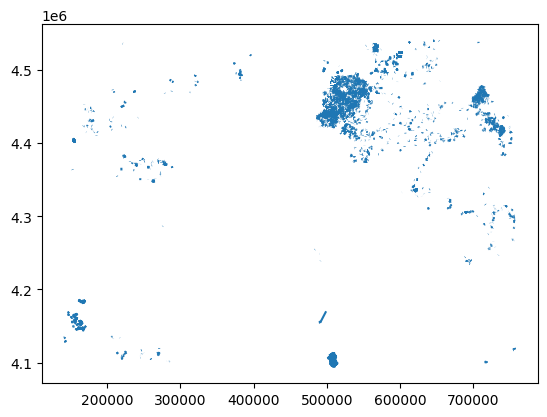

In [26]:
fl_gdf.plot()

#### Spills Transformation

<Axes: >

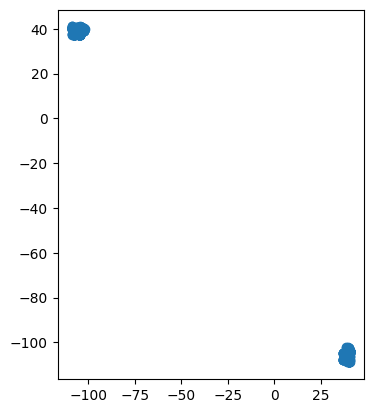

In [27]:
# Convert 'spills' DataFrame to GeoDataFrame 'spl_gdf' with Point geometries from 'Long' and 'Lat', setting CRS to 'EPSG:4326'.
spl_gdf = gpd.GeoDataFrame(final_spills, geometry=gpd.points_from_xy(final_spills.Long,final_spills.Lat), crs='EPSG:4326')
spl_gdf.head(2)
spl_gdf.plot()

In [28]:
# Check if the CRS of fl_gdf is different from that of gdf
if spl_gdf.crs != gdf.crs:
    # If true, convert the CRS of fl_gdf to match that of gdf, modifying fl_gdf in place
    spl_gdf.to_crs(gdf.crs, inplace=True)
    print('Change spl crs to gdf crs')

Change spl crs to gdf crs


<Axes: >

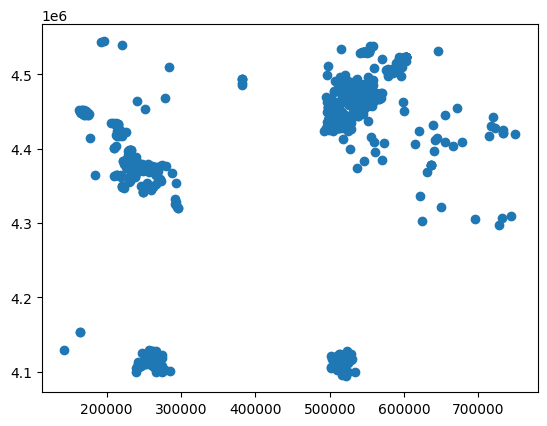

In [29]:
spl_gdf.plot()

### Download all new gbd files

In [30]:
gdf.to_file('crudeoil_offlocation.geojson', driver='GeoJSON')

In [31]:
fl_gdf.to_file('flowlines.geojson', driver='GeoJSON')

/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/ecmc_env/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Infinite or NaN coordinate encountered
  ogr_write(


In [32]:
spl_gdf.to_file('spills.geojson', driver='GeoJSON')

/Users/ichittumuri/Desktop/MINES/COGCC-Risk-Analysis/ecmc_env/lib/python3.11/site-packages/pyogrio/raw.py:709: RuntimeWarning: Infinite or NaN coordinate encountered
  ogr_write(
